# Data From: https://www.kaggle.com/matthew2001/bank-loan-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_values = pd.read_csv(r"C:\Users\kids\PycharmProjects\MachineLearningProjects\LoansClassifier\borrower_table.csv", index_col="loan_id")
df_labels = pd.read_csv(r"C:\Users\kids\PycharmProjects\MachineLearningProjects\LoansClassifier\loan_table.csv", index_col="loan_id")

In [3]:
df_values.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
loan_id,,,,,,,,,,,
289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [4]:
df_labels.head()

,loan_purpose,date,loan_granted,loan_repaid
loan_id,,,,
19454,investment,2012-03-15,0,NaN
496811,investment,2012-01-17,0,NaN
929493,other,2012-02-09,0,NaN
580653,other,2012-06-27,1,1.0
172419,business,2012-05-21,1,0.0


# Data Cleaning

In [5]:
df_values.sort_index(inplace=True)
df_values.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
loan_id,,,,,,,,,,,
30,0,1.0,0.0,4900,0.60,1378,1414,0,0,43,8
34,1,NaN,NaN,7800,1.04,1053,1243,0,0,71,8
37,0,1.0,0.0,3800,0.59,3212,9336,1,36000,27,1
39,0,1.0,0.0,8200,0.69,654,5272,1,35700,44,0
40,1,NaN,NaN,5000,0.84,2362,1308,1,9000,45,8


In [6]:
df_labels.sort_index(inplace=True)
df_labels.drop(["date", "loan_repaid"], axis=1, inplace=True) # Getting rid of unnecessary columns.
df_labels.head(10) # It is essential to sort the datasets in order to concatenate `df_labels.loan_purpose` and `df_labels.loan_granted` columns with `df_values`.

,loan_purpose,loan_granted
loan_id,,
30,home,0
34,business,0
37,investment,1
39,emergency_funds,0
40,home,0
48,investment,1
49,home,0
109,investment,1
111,business,1


In [7]:
df_values.shape, df_labels.shape

((101100, 11), (101100, 2))

In [8]:
df = df_values.copy()
df.head(10)

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
loan_id,,,,,,,,,,,
30,0,1.0,0.0,4900,0.60,1378,1414,0,0,43,8
34,1,NaN,NaN,7800,1.04,1053,1243,0,0,71,8
37,0,1.0,0.0,3800,0.59,3212,9336,1,36000,27,1
39,0,1.0,0.0,8200,0.69,654,5272,1,35700,44,0
40,1,NaN,NaN,5000,0.84,2362,1308,1,9000,45,8
48,1,NaN,NaN,3200,0.50,805,1757,1,2400,57,8
49,0,0.0,0.0,2600,0.67,850,2678,1,25300,49,1
109,0,0.0,0.0,4800,1.02,494,2404,0,0,49,4
111,0,0.0,1.0,3800,0.78,929,3114,1,42600,61,1


In [9]:
df["loan_purpose"] = df_labels.loan_purpose
df["loan_granted"] = df_labels.loan_granted
df.head(10)

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,loan_granted
loan_id,,,,,,,,,,,,,
30,0,1.0,0.0,4900,0.60,1378,1414,0,0,43,8,home,0
34,1,NaN,NaN,7800,1.04,1053,1243,0,0,71,8,business,0
37,0,1.0,0.0,3800,0.59,3212,9336,1,36000,27,1,investment,1
39,0,1.0,0.0,8200,0.69,654,5272,1,35700,44,0,emergency_funds,0
40,1,NaN,NaN,5000,0.84,2362,1308,1,9000,45,8,home,0
48,1,NaN,NaN,3200,0.50,805,1757,1,2400,57,8,investment,1
49,0,0.0,0.0,2600,0.67,850,2678,1,25300,49,1,home,0
109,0,0.0,0.0,4800,1.02,494,2404,0,0,49,4,investment,1
111,0,0.0,1.0,3800,0.78,929,3114,1,42600,61,1,business,1


In [10]:
df.dtypes

is_first_loan                                        int64
fully_repaid_previous_loans                        float64
currently_repaying_other_loans                     float64
total_credit_card_limit                              int64
avg_percentage_credit_card_limit_used_last_year    float64
saving_amount                                        int64
checking_amount                                      int64
is_employed                                          int64
yearly_salary                                        int64
age                                                  int64
dependent_number                                     int64
loan_purpose                                        object
loan_granted                                         int64
dtype: object

In [11]:
df.shape

(101100, 13)

In [12]:
def plot_null_values(df: pd.DataFrame):
    """
    This function plots heatmap of the null values.
    :param df: The dataframe that we want to plot its empty values heatmap.
    """
    plt.figure(figsize=(16, 9))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

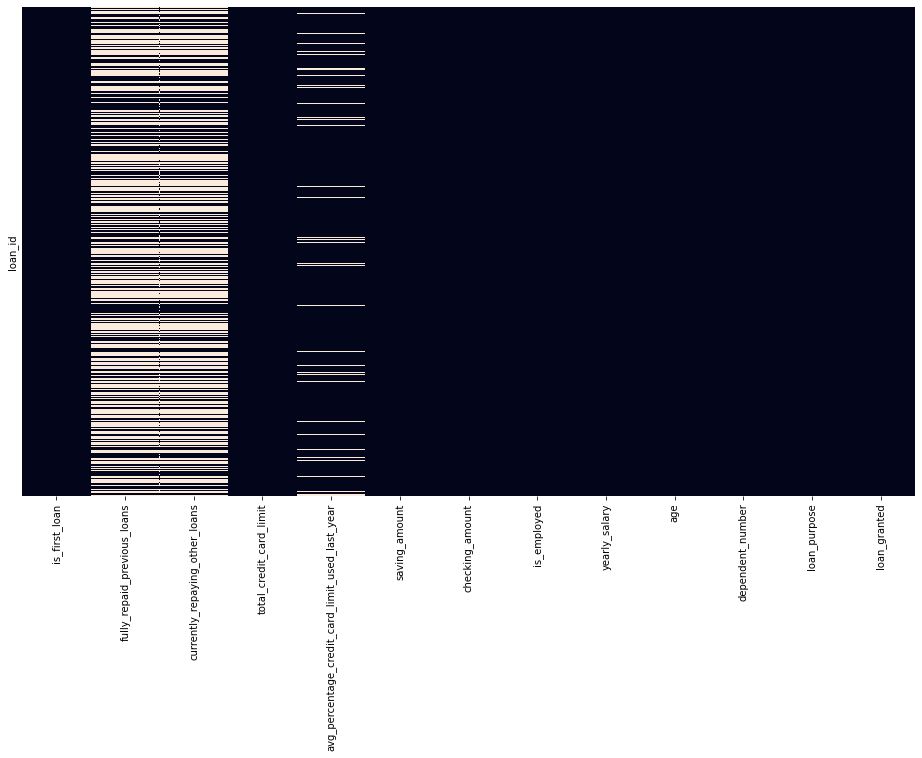

In [13]:
plot_null_values(df)

<Figure size 1152x648 with 0 Axes>

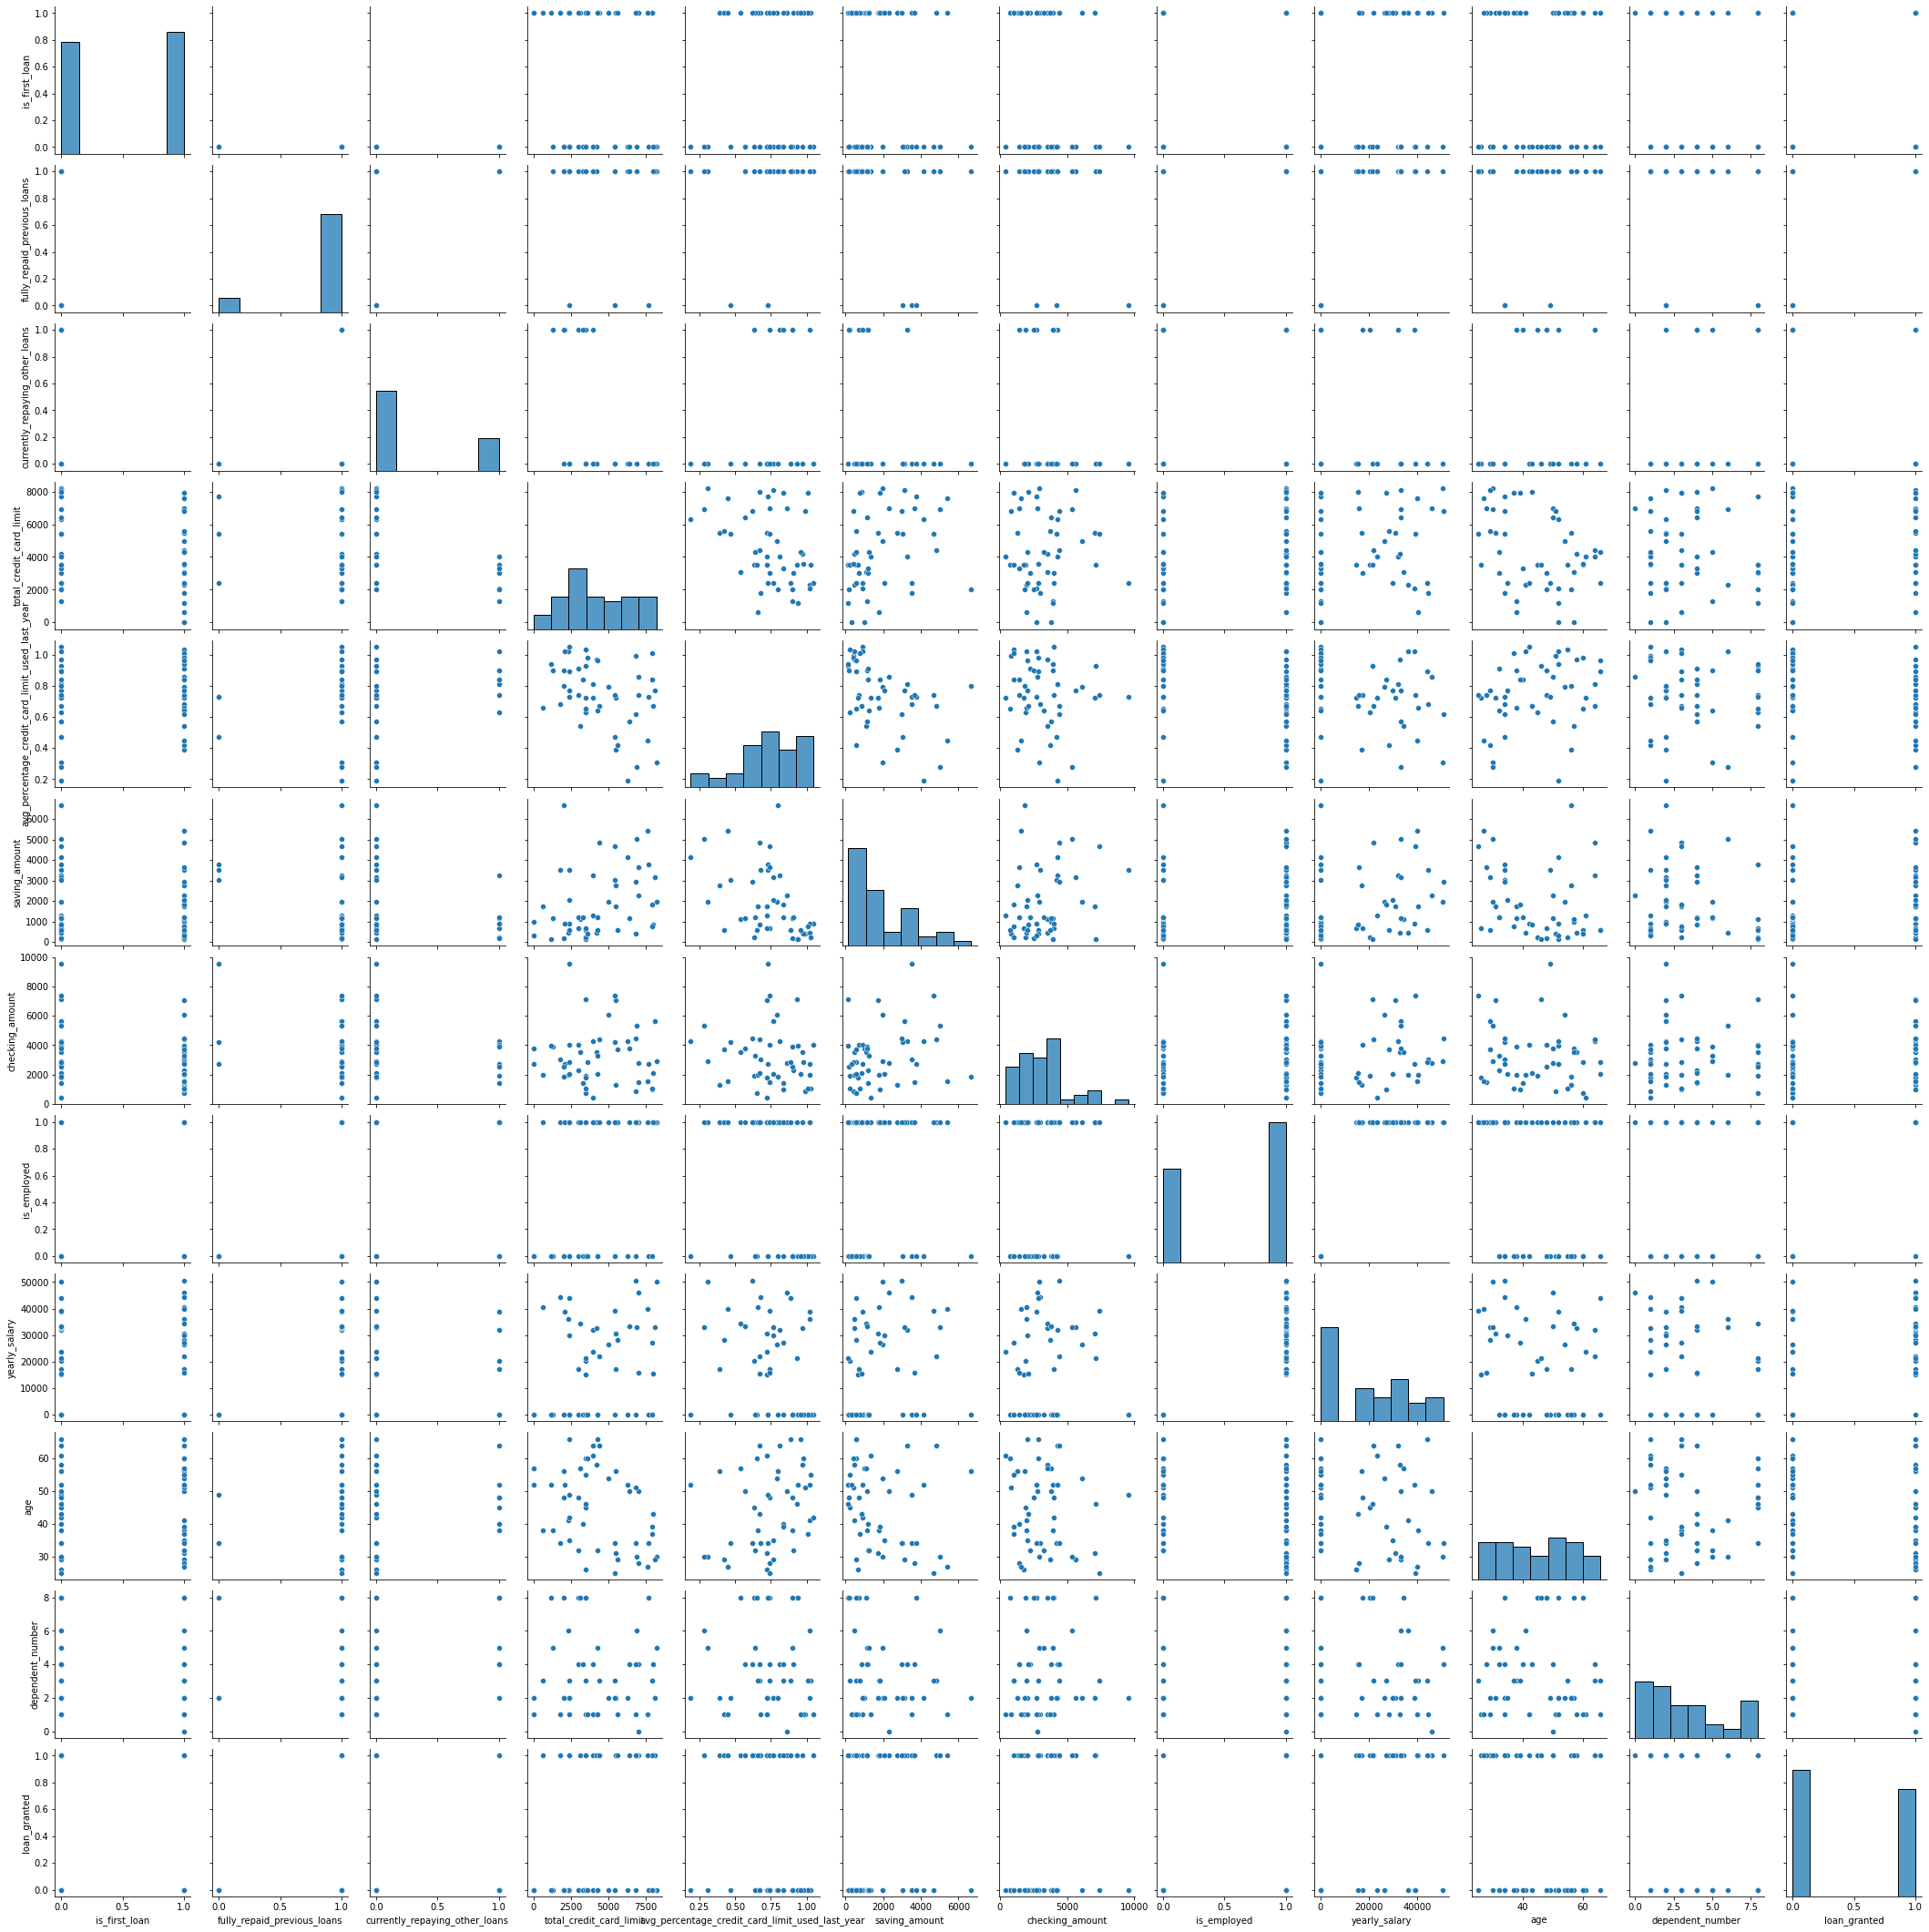

In [14]:
plt.figure(figsize=(16, 9))
sns.pairplot(df.sample(50))

In [15]:
df.isna().sum()

is_first_loan                                          0
fully_repaid_previous_loans                        54947
currently_repaying_other_loans                     54947
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year     6972
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
loan_purpose                                           0
loan_granted                                           0
dtype: int64

In [16]:
df.is_first_loan.value_counts()

1    54947
0    46153
Name: is_first_loan, dtype: int64

In [17]:
df[(df["is_first_loan"] == 1) & (df["fully_repaid_previous_loans"].isna()) & (df["currently_repaying_other_loans"].isna())].shape


(54947, 13)

We can see that wherever `is_first_loan` is `1`,
`fully_repaid_previous_loans` and `currently_repaying_other_loans` are `Nan`.
From cell `#16`, we can see there are 54947 appearances of the mentioned case(There are 54947 `NaN` values in `fully_repaid_previous_loans` and `currently_repaying_other_loans`).
`1` appears in `is_first_loan` 54947 times.
Therefore, if we delete all `NaN` values in `fully_repaid_previous_loans` and `currently_repaying_other_loans`, `is_first_loan` column will contain a single value - `0`.
To prevent any errors, we will replace `NaN` values in `fully_repaid_previous_loans` and `currently_repaying_other_loans` with `-1`, which means `unknown`.

In [18]:
df.fully_repaid_previous_loans.fillna(-1, inplace=True)
df.currently_repaying_other_loans.fillna(-1, inplace=True)

In [19]:
df.isna().sum()

is_first_loan                                         0
fully_repaid_previous_loans                           0
currently_repaying_other_loans                        0
total_credit_card_limit                               0
avg_percentage_credit_card_limit_used_last_year    6972
saving_amount                                         0
checking_amount                                       0
is_employed                                           0
yearly_salary                                         0
age                                                   0
dependent_number                                      0
loan_purpose                                          0
loan_granted                                          0
dtype: int64

In [20]:
df.dropna(subset=['avg_percentage_credit_card_limit_used_last_year'], inplace=True)
df.shape

(94128, 13)

In [21]:
df.isna().sum()

is_first_loan                                      0
fully_repaid_previous_loans                        0
currently_repaying_other_loans                     0
total_credit_card_limit                            0
avg_percentage_credit_card_limit_used_last_year    0
saving_amount                                      0
checking_amount                                    0
is_employed                                        0
yearly_salary                                      0
age                                                0
dependent_number                                   0
loan_purpose                                       0
loan_granted                                       0
dtype: int64

In [22]:
df_dummies = pd.get_dummies(df.loan_purpose, drop_first=True)
df = pd.concat([df, df_dummies], axis=1)
df.drop("loan_purpose", axis=1, inplace=True) # Replacing a string column with its dummy representation.

In [23]:
df.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,emergency_funds,home,investment,other
loan_id,,,,,,,,,,,,,,,,
30,0,1.0,0.0,4900,0.60,1378,1414,0,0,43,8,0,0,1,0,0
34,1,-1.0,-1.0,7800,1.04,1053,1243,0,0,71,8,0,0,0,0,0
37,0,1.0,0.0,3800,0.59,3212,9336,1,36000,27,1,1,0,0,1,0
39,0,1.0,0.0,8200,0.69,654,5272,1,35700,44,0,0,1,0,0,0
40,1,-1.0,-1.0,5000,0.84,2362,1308,1,9000,45,8,0,0,1,0,0


In [24]:
df.shape

(94128, 16)

In [25]:
df.dtypes

is_first_loan                                        int64
fully_repaid_previous_loans                        float64
currently_repaying_other_loans                     float64
total_credit_card_limit                              int64
avg_percentage_credit_card_limit_used_last_year    float64
saving_amount                                        int64
checking_amount                                      int64
is_employed                                          int64
yearly_salary                                        int64
age                                                  int64
dependent_number                                     int64
loan_granted                                         int64
emergency_funds                                      uint8
home                                                 uint8
investment                                           uint8
other                                                uint8
dtype: object

<Figure size 1152x648 with 0 Axes>

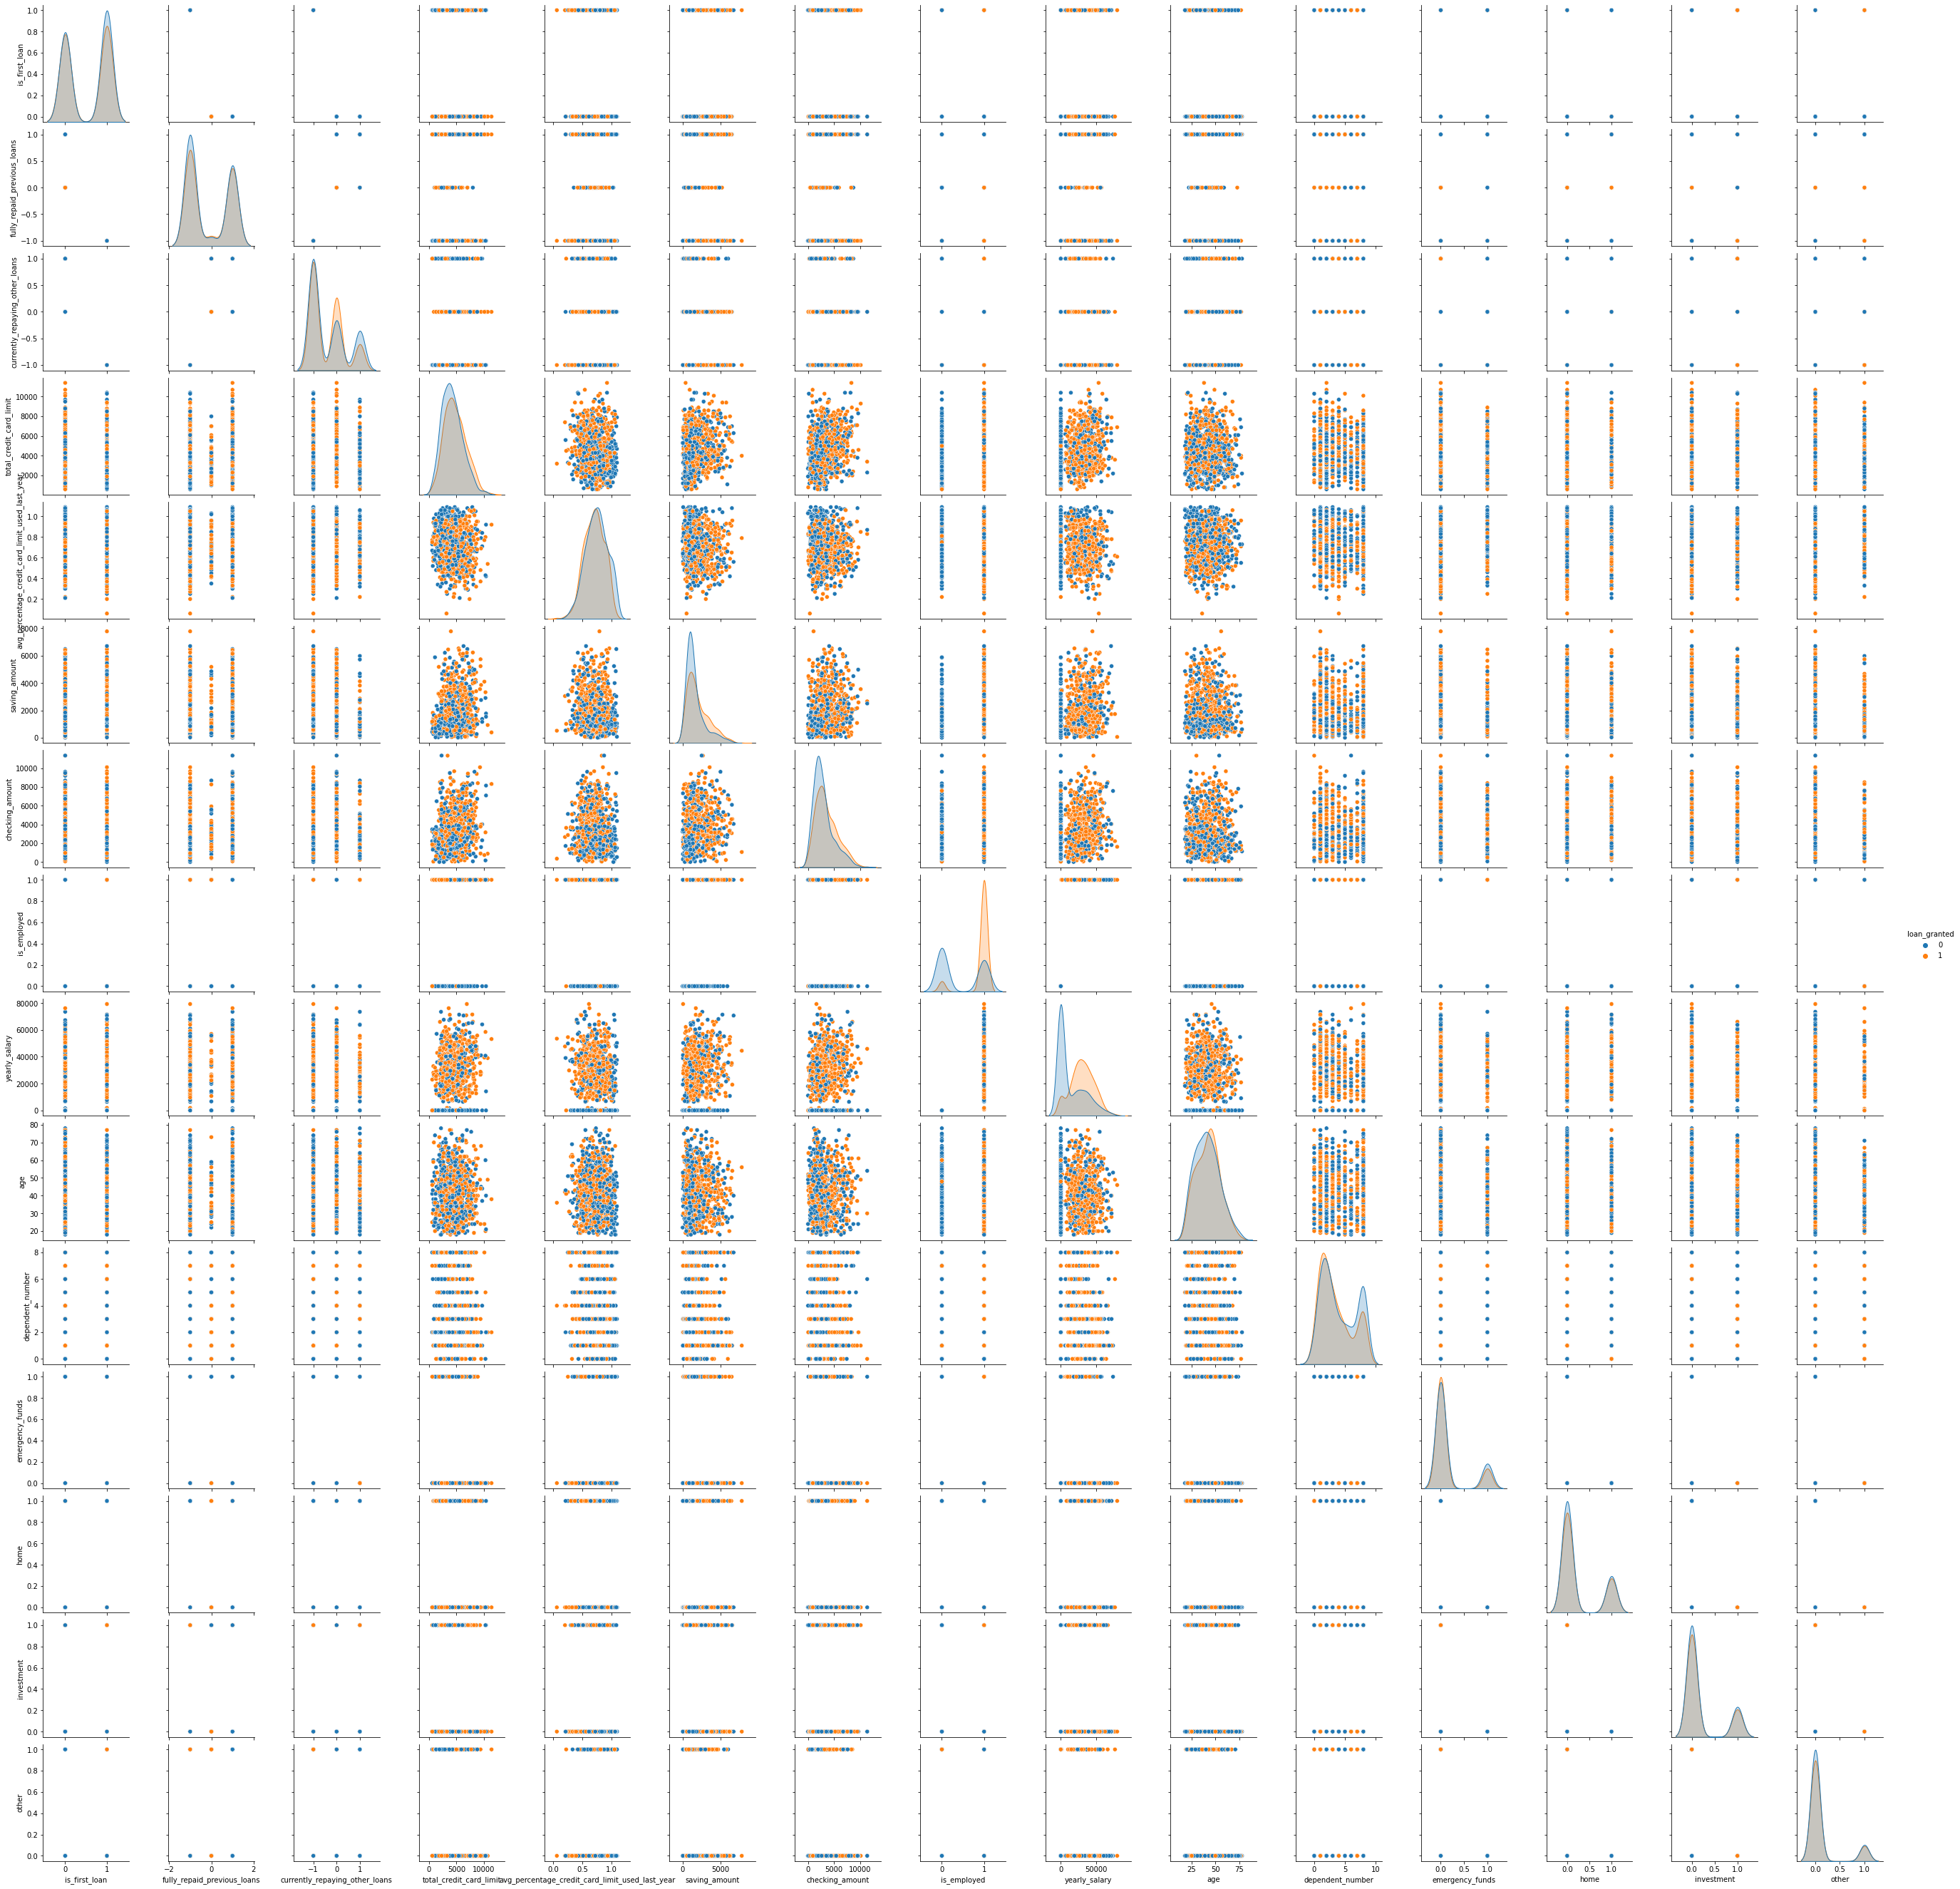

In [26]:
plt.figure(figsize=(16, 9))
sns.pairplot(df.sample(1000), hue="loan_granted")

# Data Preparation


In [27]:
def scale(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    This function scales `df`.
    :param df: A `pd.DataFrame` to scale.
    :param columns: The columns in `df` that we want to scale.
    :return: A scaled `pd.DataFrame`.
    """
    for column in columns:
        scaler = MinMaxScaler()
        df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))
    return df

In [28]:
COLUMNS_TO_SCALE = ["total_credit_card_limit", "avg_percentage_credit_card_limit_used_last_year", "saving_amount", "checking_amount", "yearly_salary", "age", "dependent_number"]

In [29]:
df = scale(df, COLUMNS_TO_SCALE)


In [30]:
df.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,emergency_funds,home,investment,other
loan_id,,,,,,,,,,,,,,,,
30,0,1.0,0.0,0.338462,0.550459,0.129499,0.101683,0,0.000000,0.409836,1.000,0,0,1,0,0
34,1,-1.0,-1.0,0.561538,0.954128,0.098957,0.089386,0,0.000000,0.868852,1.000,0,0,0,0,0
37,0,1.0,0.0,0.253846,0.541284,0.301851,0.671365,1,0.370370,0.147541,0.125,1,0,0,1,0
39,0,1.0,0.0,0.592308,0.633028,0.061460,0.379117,1,0.367284,0.426230,0.000,0,1,0,0,0
40,1,-1.0,-1.0,0.346154,0.770642,0.221972,0.094060,1,0.092593,0.442623,1.000,0,0,1,0,0


In [31]:
X = df.drop("loan_granted", axis=1)
y = df.loan_granted

In [32]:
def create_models() -> set:
    """
    This function creates set of models.
    :return: set that contains all the models.
    """
    models = {
        "GradientBoostingClassifier" : {
            "model" : GradientBoostingClassifier(),
            "params" : {
                "loss" : ['exponential'],
                "n_estimators" : [75],
            }
        },
        "SVC" : {
            "model" : SVC(),
            "params" : {
                "C" : [1, 2, 3],
                "gamma" : ['scale', 'auto'],
                "degree" : [2, 3, 4],
                "kernel" : ['rbf', 'sigmoid']
            }
        },
        "GaussianNB" : {
            "model" : GaussianNB(),
            "params" : {
            }
        },
        "MultinomialNB" : {
            "model" : MultinomialNB(),
            "params" : {
                "alpha" : [x / 10 for x in range(20)]
            }
        },
        "DecisionTreeClassifier" : {
            "model" : DecisionTreeClassifier(),
            "params" : {
                "max_depth" : [x for x in range(10, 100, 10)],
                "splitter" : ["best", "random"]
            }
        },
        "ExtraTreesClassifier" : {
            "model" : ExtraTreesClassifier(),
            "params" : {
                "n_estimators" : [75, 100, 150, 175, 200],
                "min_samples_split" : [x for x in range(10)],
                "max_features" : ["sqrt", "log2", 1, 2]
            }
        },
        "RandomForestClassifier" : {
            "model" : RandomForestClassifier(),
            "params" : {
                "n_estimators" : [75, 100, 150, 175, 200]
            }
        },
        "KNeighborsClassifier" : {
            "model" : KNeighborsClassifier(),
            "params" : {
                "n_neighbors" : [x for x in range(3, 15, 2)],
                "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute']
            }
        }
    }

    return models

In [33]:
def grid_searcher(models: set, X, y) -> list:
    """
    This function checks what are the best models and what are the best params.
    :param models: set of the models.
    :param X: X data.
    :param y: y data.
    """
    for model_name, model_values in models.items():
        searcher = GridSearchCV(model_values["model"], model_values["params"], cv=4, return_train_score=False)
        searcher.fit(X, y)
        print(model_name) # Tracking where the searching process is.
        print(f"Model's Params:\n{searcher.best_params_}") # Getting the best scores for the model.
        print(f"Model's Score:\n{searcher.best_score_}")
        print()

In [34]:
models = create_models()


In [ ]:
grid_searcher(models, X, y)


GradientBoostingClassifier
Model's Params:
{'loss': 'exponential', 'n_estimators': 75}
Model's Score:
0.772628760836308

